<a href="https://www.kaggle.com/code/dayyak/vehicle-sales-ds-analysis?scriptVersionId=169252140" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Python Library & Configuration setup

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt

In [2]:
# Matplotlib Configuration and Styling Setup

plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [3]:
# Read Dataset

vehicle_sales_df = pd.read_csv("/kaggle/input/vehicle-sales-data/car_prices.csv", usecols=['year', 'make','model', 'trim', 'body', 'transmission', 'state', 'condition', 'odometer', 'color', 'interior', 'seller', 'mmr', 'sellingprice', 'saledate'])


In [4]:
# Display dataset information

vehicle_sales_df.info(verbose=False, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Columns: 15 entries, year to saledate
dtypes: float64(4), int64(1), object(10)
memory usage: 378.5 MB


In [5]:
vehicle_sales_df.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr             float64
sellingprice    float64
saledate         object
dtype: object

# Data Cleaning and Preprocessing

In [6]:
# Check for Repetition
vehicle_sales_df.duplicated().sum() 

0

In [7]:
# Examine the dataset for any missing or NaN values.
for col in vehicle_sales_df.columns:
    pct_missing = np.mean(vehicle_sales_df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

year - 0.0%
make - 0.018432924090566658%
model - 0.01860828828441925%
trim - 0.019059224782897337%
body - 0.02361153610086662%
transmission - 0.1169428652719845%
state - 0.0%
condition - 0.021151069095281808%
odometer - 0.00016820647165452537%
color - 0.0013402834815876544%
interior - 0.0013402834815876544%
seller - 0.0%
mmr - 6.799836088161665e-05%
sellingprice - 2.147316659419473e-05%
saledate - 2.147316659419473e-05%


In [8]:
# Check missing data in these columns 
mask = (vehicle_sales_df['make'].isnull() | vehicle_sales_df['make'].eq('') | 
        vehicle_sales_df['model'].isnull() | vehicle_sales_df['model'].eq('') | 
        vehicle_sales_df['body'].isnull() | vehicle_sales_df['body'].eq('') | 
        vehicle_sales_df['transmission'].isnull() | vehicle_sales_df['transmission'].eq('') |
        vehicle_sales_df['odometer'].isnull() | vehicle_sales_df['odometer'].eq('') |  
        vehicle_sales_df['color'].isnull() | vehicle_sales_df['color'].eq('') | 
        vehicle_sales_df['interior'].isnull() | vehicle_sales_df['interior'].eq('') |  
        vehicle_sales_df['mmr'].isnull() | vehicle_sales_df['mmr'].eq('') |  
        vehicle_sales_df['sellingprice'].isnull() | vehicle_sales_df['sellingprice'].eq('') | 
        vehicle_sales_df['saledate'].isnull() | vehicle_sales_df['saledate'].eq(''))
    
# Exclude rows with null or empty values in any of the specified columns
vehicle_sales_df = vehicle_sales_df[~mask]

In [9]:
# Check some columns that contained non-aplpahabetic characters 
alpha_mask = (vehicle_sales_df['color'].str.isalpha() &
              vehicle_sales_df['interior'].str.isalpha())

# Exclude rows with non-aplpahabetic characters of the specified columns
vehicle_sales_df = vehicle_sales_df[alpha_mask]

In [10]:
# Normalize letter case for selected columns used in subsequent analysis
vehicle_sales_df['color'] = vehicle_sales_df['color'].str.lower()
vehicle_sales_df['body'] = vehicle_sales_df['body'].str.lower()

I found that dividing the 'Selling Date' column into three separate columns enhances the effectiveness of data analysis. As a result, I developed this block of code to facilitate this process.

In [11]:
# I use this line of code to avoid timezone conversion error which I couldn't handle it
# so I removed timezone information from 'saledate' column
vehicle_sales_df['saledate'] = vehicle_sales_df['saledate'].astype(str).str[:-23]

# Convert 'saledate' column to datetime format, specifying the timezone if needed
vehicle_sales_df['saledate'] = pd.to_datetime(vehicle_sales_df['saledate'])

vehicle_sales_df['saleyear'] = vehicle_sales_df['saledate'].dt.year.astype(int)
vehicle_sales_df['salemonth'] = vehicle_sales_df['saledate'].dt.month.astype(int)
vehicle_sales_df['saleday'] = vehicle_sales_df['saledate'].dt.strftime('%A')


#  Data Visualization and Analysis 

In [12]:
vehicle_sales_df.describe()

,year,condition,odometer,mmr,sellingprice,saledate,saleyear,salemonth
count,444750.000000,438913.000000,444750.000000,444750.000000,444750.000000,444750,444750.000000,444750.000000
mean,2010.077565,30.606173,68350.513882,13543.060540,13391.127642,2015-03-06 04:30:29.212816640,2014.909650,3.736396
min,1990.000000,1.000000,1.000000,25.000000,1.000000,2014-01-01 00:00:00,2014.000000,1.000000
25%,2008.000000,23.000000,29026.000000,7075.000000,6900.000000,2015-01-21 00:00:00,2015.000000,1.000000
50%,2012.000000,34.000000,53097.500000,12100.000000,12000.000000,2015-02-16 00:00:00,2015.000000,2.000000
75%,2013.000000,41.000000,98980.000000,17950.000000,17800.000000,2015-05-21 00:00:00,2015.000000,6.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000,2015-07-21 00:00:00,2015.000000,12.000000
std,3.873114,13.237539,52564.320754,9426.660957,9504.743375,NaN,0.286682,3.173143


Correlation Heatmap

<Axes: >

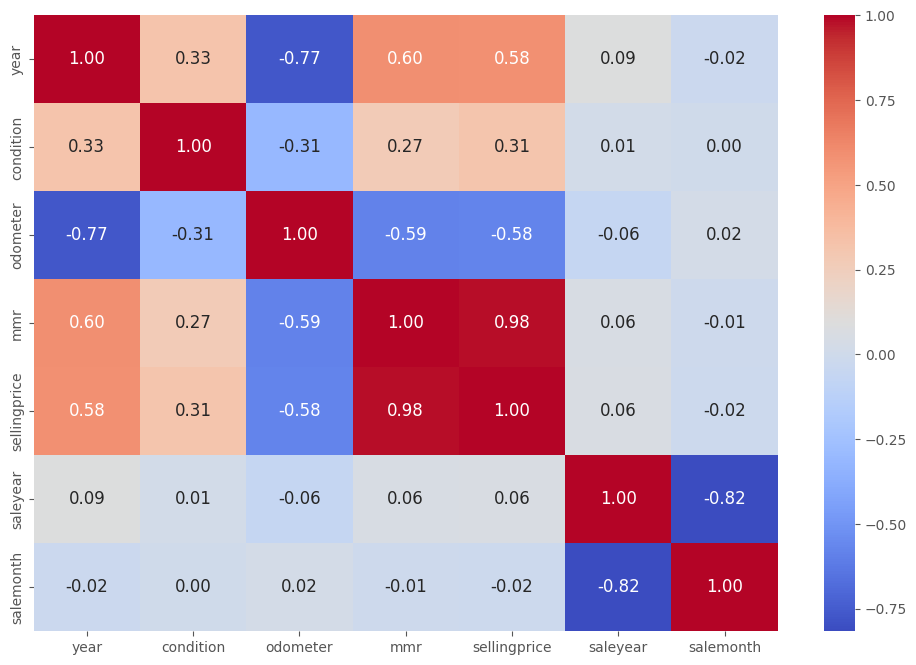

In [13]:
# Select only numeric columns
numeric_df = vehicle_sales_df.select_dtypes(include=['number'])

# Compute correlations using only numeric columns
correlation_matrix = vehicle_sales_df.select_dtypes(include=['number']).corr(method='pearson')

# Plotting correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size": 12}, xticklabels=1, yticklabels=1)


Summary of Correlation Findings:
1. Odometer and year: Strong Negative correlation
2. MMR and selling price: Strong Positive correlation
3. MMR and odometer: Moderate Negative correlation
4. Year and selling price: Moderate Positive correlation
5. Selling price and odometer: Moderate Negative correlation


mmr vs selling price plot

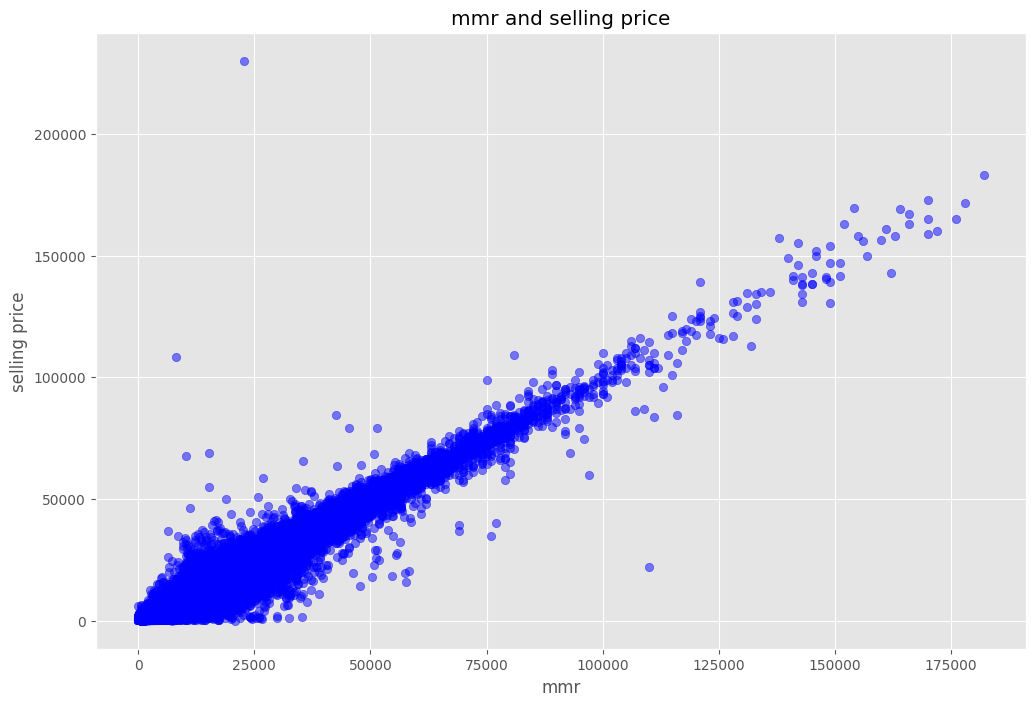

In [14]:
# Plotting mmr vs. selling
plt.scatter(vehicle_sales_df['mmr'], vehicle_sales_df['sellingprice'], color='blue', alpha=0.5)
plt.xlabel('mmr')
plt.ylabel('selling price')
plt.title('mmr and selling price')

plt.show()

Odometer vs Car Year Model

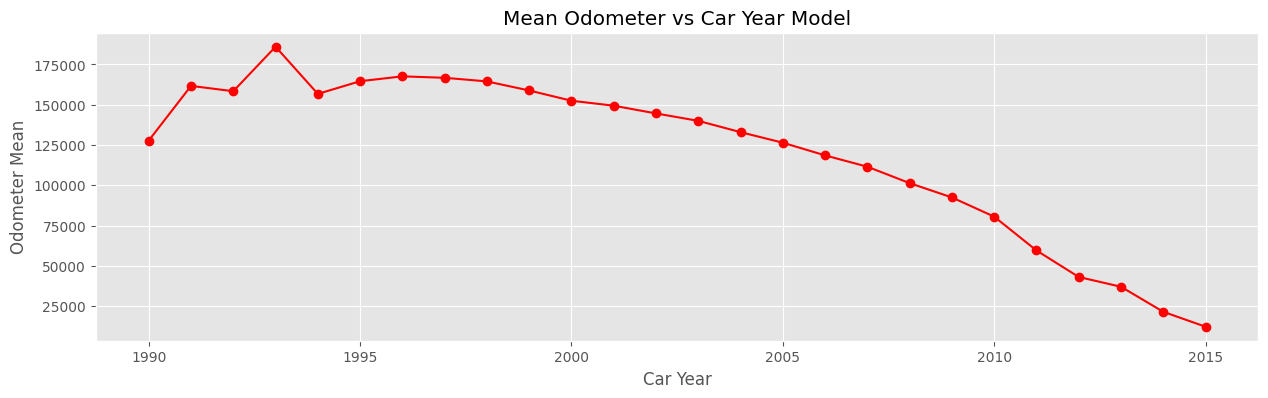

In [15]:
# Calculate the mean odometer for each car year model
mean_odometer_by_year = vehicle_sales_df.groupby('year')['odometer'].mean()

# Plotting the mean odometer each car year model
plt.figure(figsize=(15, 4))
plt.plot(mean_odometer_by_year.index, mean_odometer_by_year.values, marker='o', color='red')
plt.title('Mean Odometer vs Car Year Model')
plt.xlabel('Car Year')
plt.ylabel('Odometer Mean')
plt.grid(True)
plt.show()

Visualizing the Relationship between Odometer, Year and Selling Price

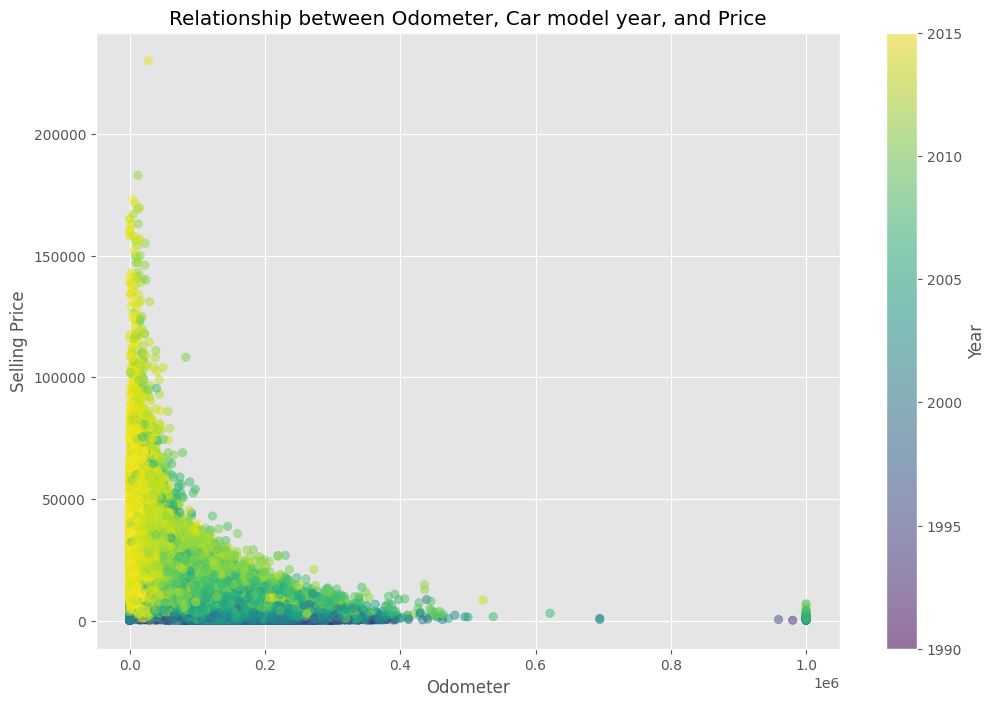

In [16]:
# Plotting odometer vs. price with color representing the year
scatter = plt.scatter(vehicle_sales_df['odometer'], vehicle_sales_df['sellingprice'], c=vehicle_sales_df['year'], cmap='viridis', alpha=0.5)
plt.colorbar(scatter, label='Year')
plt.title('Relationship between Odometer, Car model year, and Price')
plt.xlabel('Odometer')
plt.ylabel('Selling Price')
plt.grid(True)
plt.show()


**Time Frame Analysis**

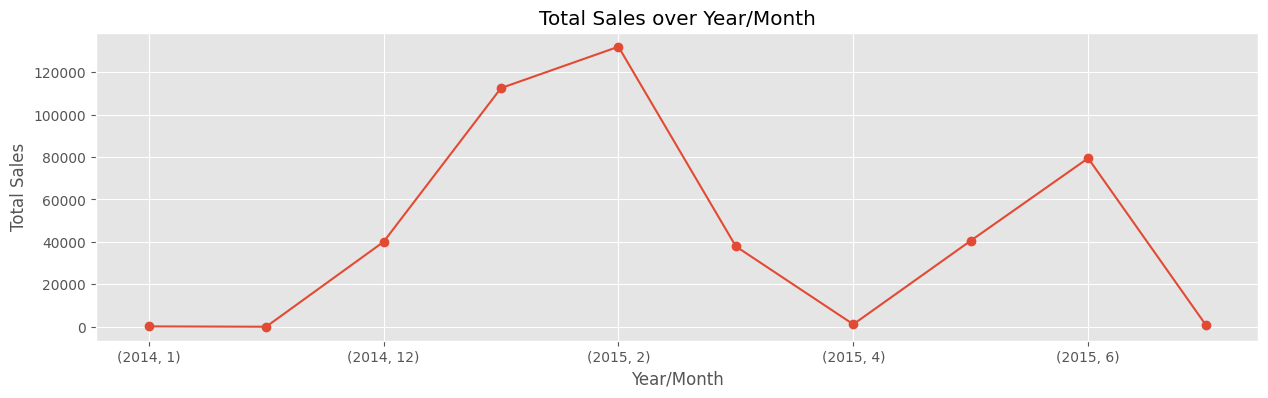

In [17]:
# Plotting Total Sales over Year/Month
vehicle_sales_df.groupby(['saleyear', 'salemonth']).size().plot(marker='o', figsize=(15, 4))
plt.xlabel('Year/Month')
plt.ylabel('Total Sales')
plt.title('Total Sales over Year/Month')
plt.grid(True)
plt.show()

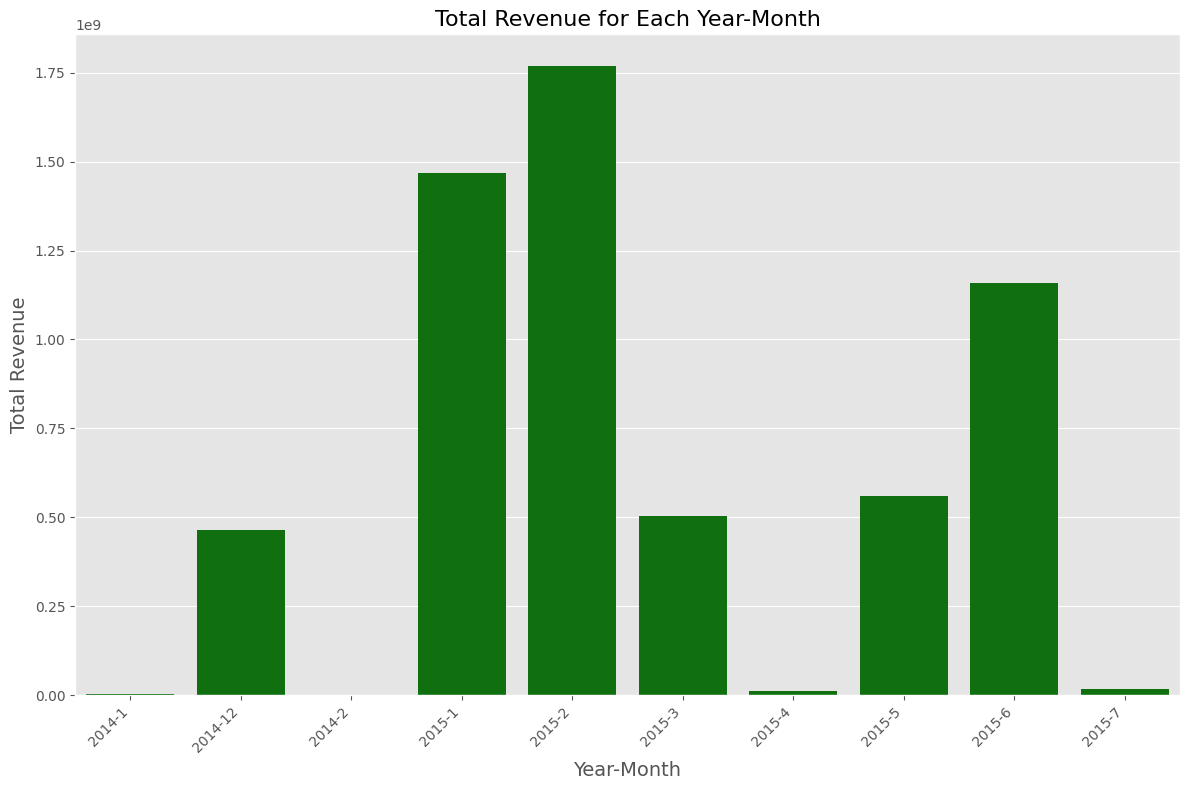

In [18]:
vehicle_sales_df['saleyearmonth'] = vehicle_sales_df['saleyear'].astype(str) + '-' + vehicle_sales_df['salemonth'].astype(str)

sales_amount = vehicle_sales_df.groupby('saleyearmonth')['sellingprice'].sum().reset_index()

sns.barplot(data=sales_amount, x='saleyearmonth', y='sellingprice', color='green')
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Total Revenue', fontsize=14)
plt.title('Total Revenue for Each Year-Month', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [19]:
# Summarizing "Total Sales over Year/Month" plot
summary = (
    vehicle_sales_df
    .groupby('saleyear')
    .filter(lambda x : len(x) > 500)
    .groupby(['saleyear', 'salemonth'])
    .size()
    .sort_values(ascending=False)
    .to_frame('Total sales')
    .reset_index()
    .rename(columns={'saleyear': 'Year', 
                     'salemonth': 'Month'})
)

summary.head()

,Year,Month,Total sales
0,2015,2,132011
1,2015,1,112517
2,2015,6,79452
3,2015,5,40547
4,2014,12,40023


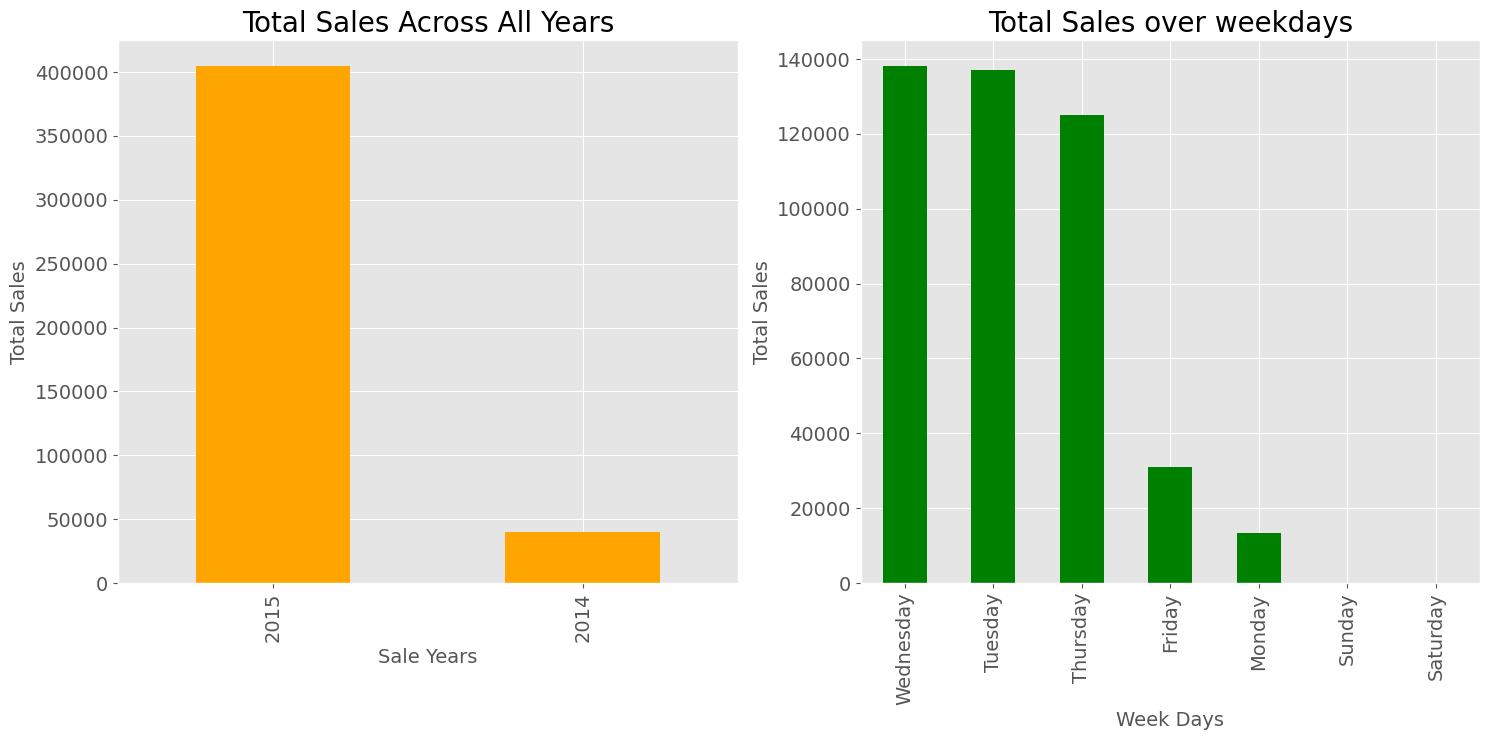

In [20]:
# Create the plot
fig, axes = plt.subplots(1, 2, figsize=(15, 7.5))

fst_axes_df = vehicle_sales_df['saleyear'].value_counts().sort_values(ascending=False)

# Plot the counts for each color
fst_axes_df.plot(kind='bar', color='orange', ax=axes[0])

# Set labels and title
axes[0].set_xlabel('Sale Years', fontsize=14)
axes[0].set_ylabel('Total Sales', fontsize=14)
axes[0].set_title('Total Sales Across All Years', fontsize=20)

axes[0].tick_params(axis='y', labelsize=14)
axes[0].tick_params(axis='x', labelsize=14)

# Plot the counts for each color
sec_axes_df = vehicle_sales_df['saleday'].value_counts().sort_values(ascending=False)

sec_axes_df.plot(kind='bar', color='green', ax=axes[1])

# Set labels and title
axes[1].set_xlabel('Week Days', fontsize=14)
axes[1].set_ylabel('Total Sales', fontsize=14)
axes[1].set_title('Total Sales over weekdays', fontsize=20)
axes[1].tick_params(axis='y', labelsize=14)
axes[1].tick_params(axis='x', labelsize=14)

plt.tight_layout()
plt.show()


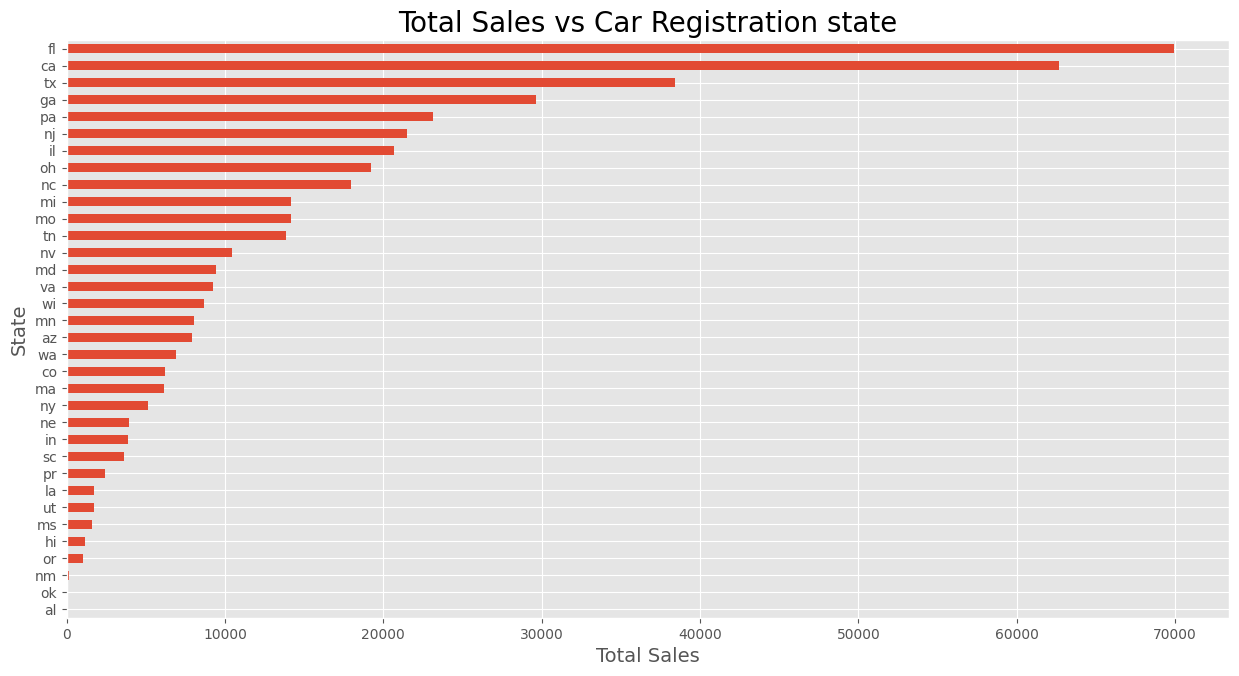

In [21]:
# Plotting Total Sales vs States
vehicle_sales_df['state'].value_counts().sort_values(ascending=True).plot(kind='barh', figsize=(15,7.5))
plt.xlabel('Total Sales', fontsize=14)
plt.ylabel('State', fontsize=14)
plt.title('Total Sales vs Car Registration state',  fontsize=20)
plt.grid(True)
plt.show()

In [22]:
# Summarizing "Total Sales vs Car Registration state" plot
summary = (
    vehicle_sales_df
    .groupby('state')
    .size()
    .sort_values(ascending=False)
    .to_frame('Total sales')
    .reset_index()
)

summary.head()

,state,Total sales
0,fl,69923
1,ca,62673
2,tx,38431
3,ga,29662
4,pa,23152


In this section, I've compiled the top-selling car make based on car rego state and computed the percentage of total sales attributed to these makes.

In [23]:
# Group the data by 'state' and 'make' and count the occurrences of each make within each state
state_make_gr = vehicle_sales_df.groupby(['state', 'make']).size().reset_index(name='records_count')

state_make_max_gr = state_make_gr.loc[state_make_gr.groupby('state')['records_count'].idxmax()]

make_records_sum = state_make_max_gr.groupby('make')['records_count'].sum()

total_records_count = make_records_sum.sum()

pct_make_state_max = round((make_records_sum / total_records_count) * 100,2)

pct_make_state_max_sorted_df = pct_make_state_max.to_frame(name='percentage').sort_values(by='percentage', ascending=False)

pct_make_state_max_sorted_df.head()



,percentage
make,
Ford,64.59
Chevrolet,13.21
Toyota,12.13
Honda,5.64
Nissan,4.43


**Feature-based Sales Analysis**

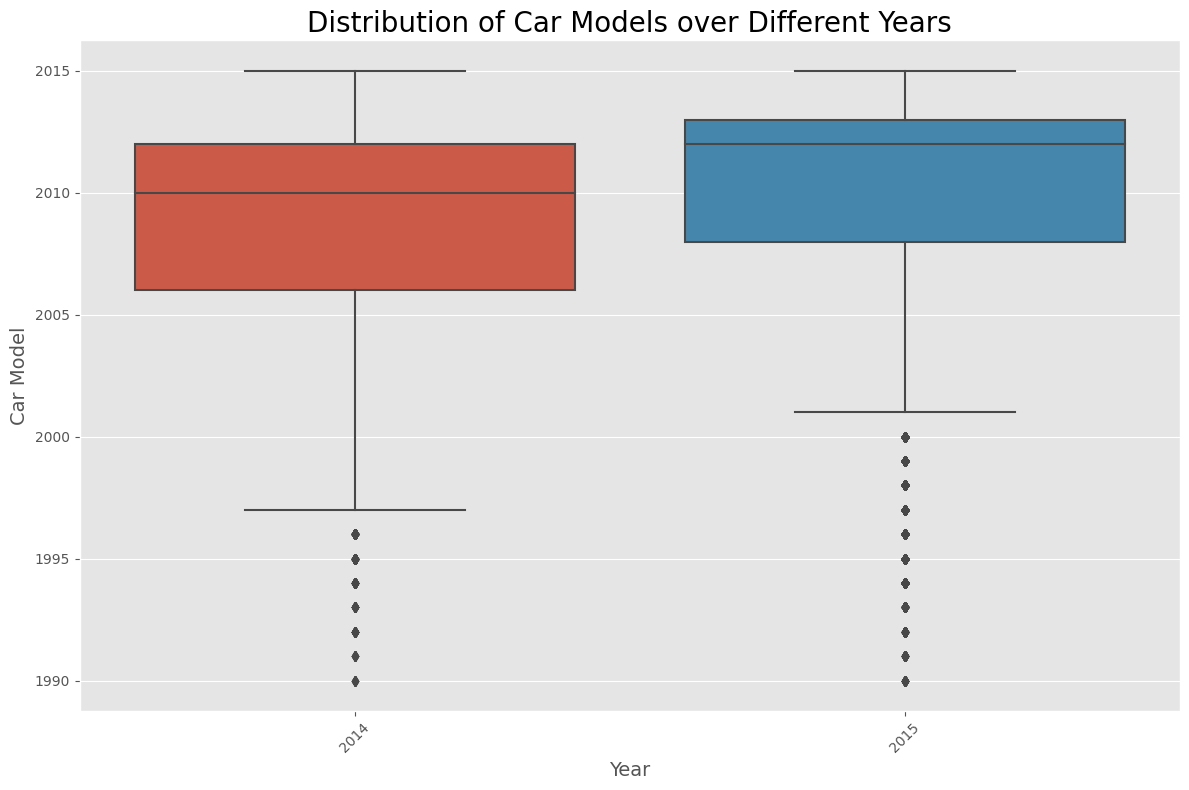

In [24]:
# Generating a Boxplot of Car Models Across Sale Years
sns.boxplot(data=vehicle_sales_df, x='saleyear', y='year')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Car Model', fontsize=14)
plt.title('Distribution of Car Models over Different Years', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

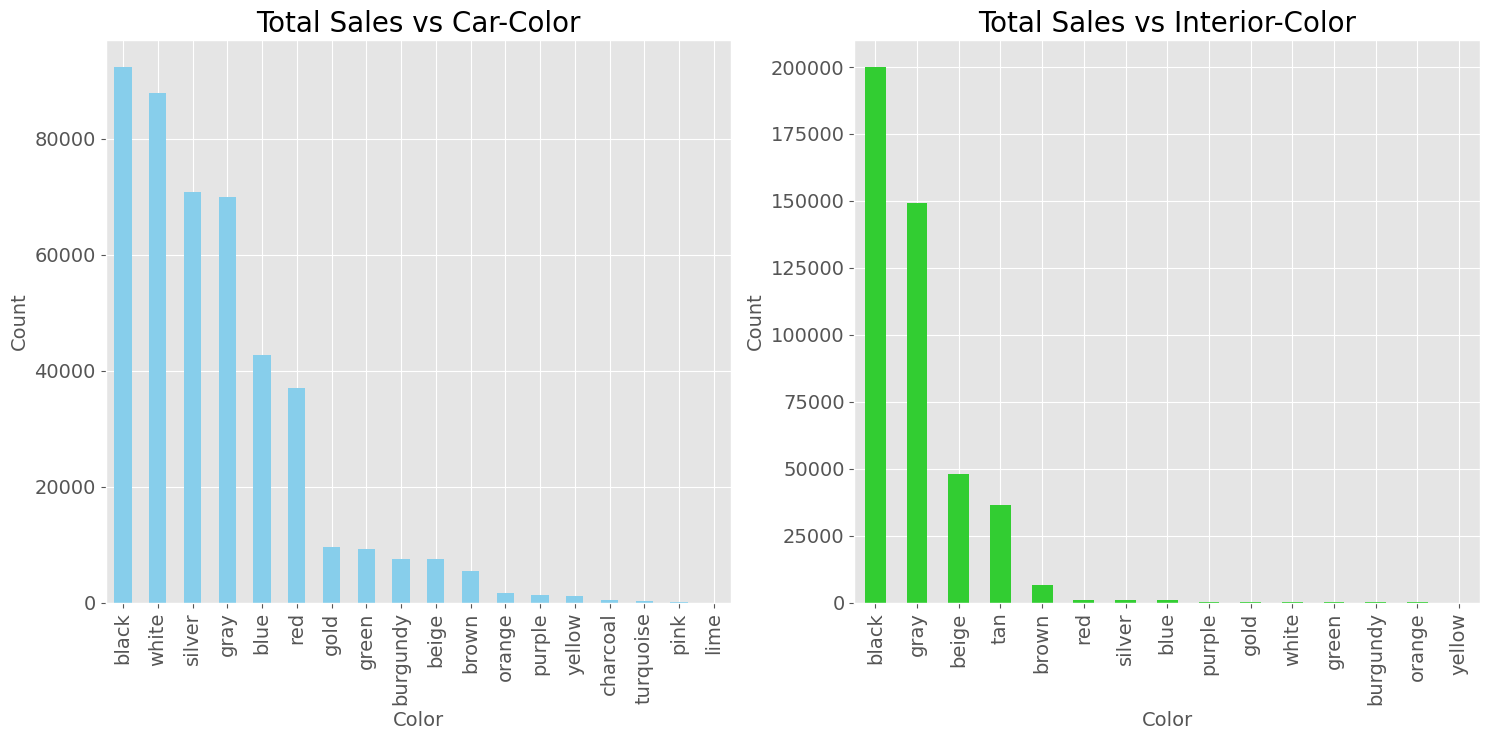

In [25]:
# Get the value counts for the 'color' column
color_counts = vehicle_sales_df['color'].value_counts().sort_values(ascending=False)

# Create the plot
fig, axes = plt.subplots(1, 2, figsize=(15, 7.5))

# Plot the counts for each color
color_counts.plot(kind='bar', color='skyblue', ax=axes[0])

# Set labels and title
axes[0].set_xlabel('Color', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].set_title('Total Sales vs Car-Color', fontsize=20)
axes[0].tick_params(axis='y', labelsize=14)
axes[0].tick_params(axis='x', labelsize=14)

# Plot the counts for each color
color_counts = vehicle_sales_df['interior'].value_counts().sort_values(ascending=False)

color_counts.plot(kind='bar', color='limegreen', ax=axes[1])

# Set labels and title
axes[1].set_xlabel('Color', fontsize=14)
axes[1].set_ylabel('Count', fontsize=14)
axes[1].set_title('Total Sales vs Interior-Color', fontsize=20)
axes[1].tick_params(axis='y', labelsize=14)
axes[1].tick_params(axis='x', labelsize=14)

plt.tight_layout()
plt.show()


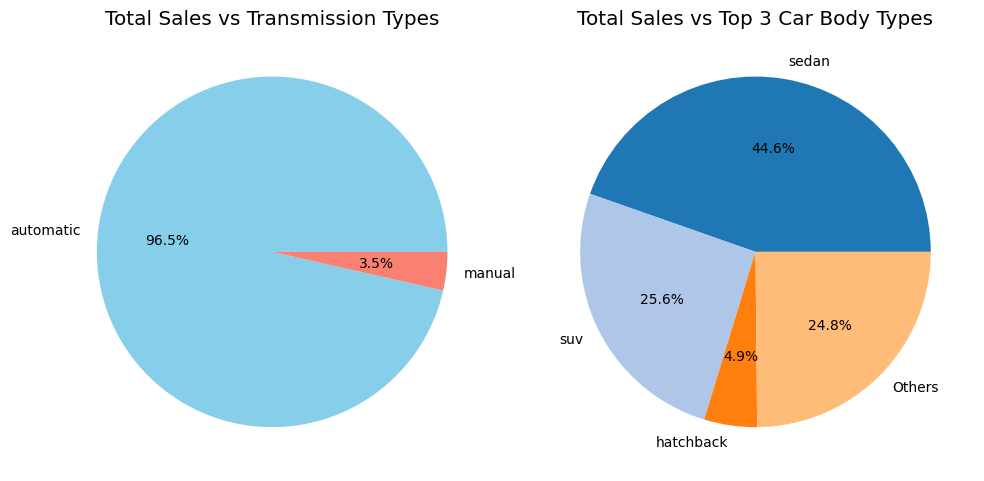

In [26]:
transmission_counts = vehicle_sales_df['transmission'].value_counts()


# Plotting two pie charts for transmission types in one plot
plt.figure(figsize=(10, 5))

# First pie chart
plt.subplot(1, 2, 1)
plt.pie(transmission_counts, labels=transmission_counts.index, autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Total Sales vs Transmission Types')

# Second pie chart

car_body_counts = vehicle_sales_df['body'].value_counts()
# Select the top 10 most common car body types 
top_car_body = car_body_counts.head(3)
other_sales = car_body_counts.iloc[3:].sum()
top_car_body['Others'] = other_sales

plt.subplot(1, 2, 2)
plt.pie(top_car_body, labels=top_car_body.index, autopct='%1.1f%%', colors=plt.cm.tab20.colors)
plt.title('Total Sales vs Top 3 Car Body Types')

plt.tight_layout()
plt.show()


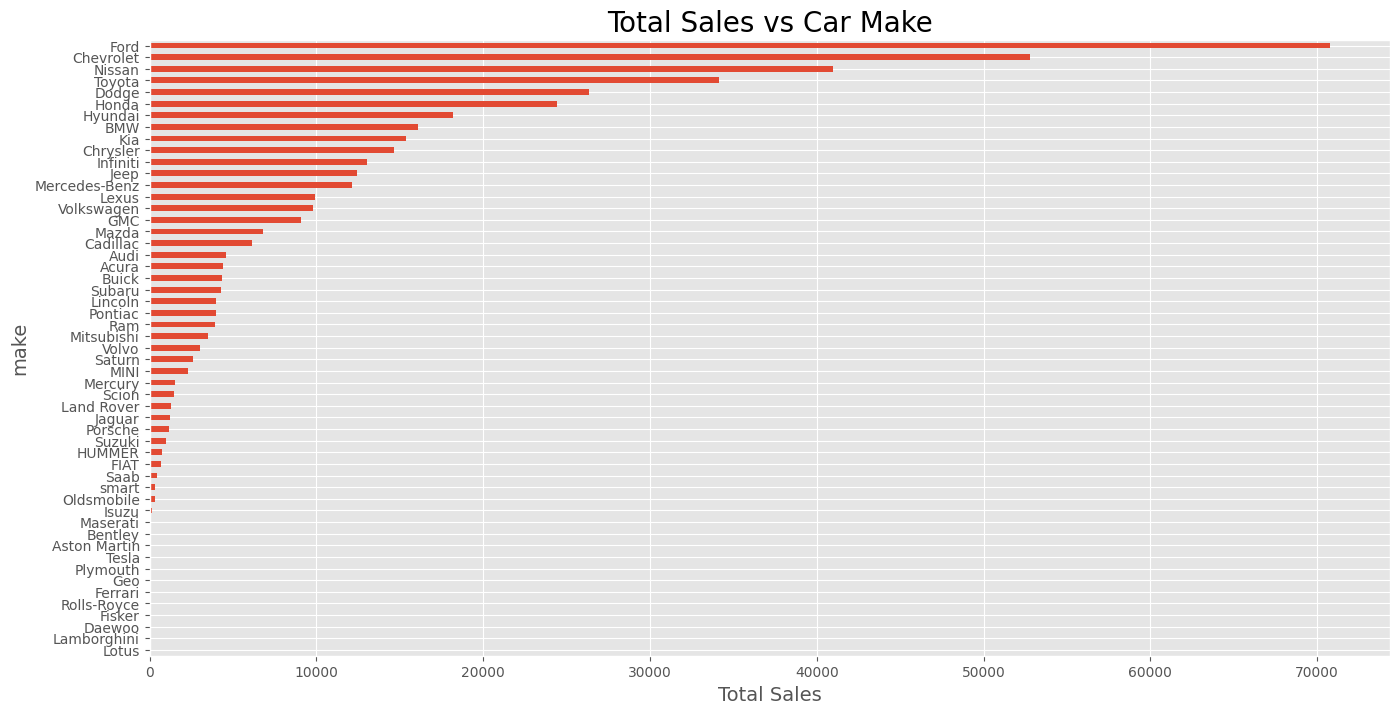

In [27]:
# Plotting Total Sales vs States
vehicle_sales_df['make'].value_counts().sort_values(ascending=True).plot(kind='barh', figsize=(16,8))
plt.xlabel('Total Sales', fontsize=14)
plt.ylabel('make', fontsize=14)
plt.title('Total Sales vs Car Make',  fontsize=20)
plt.grid(True)
plt.show()

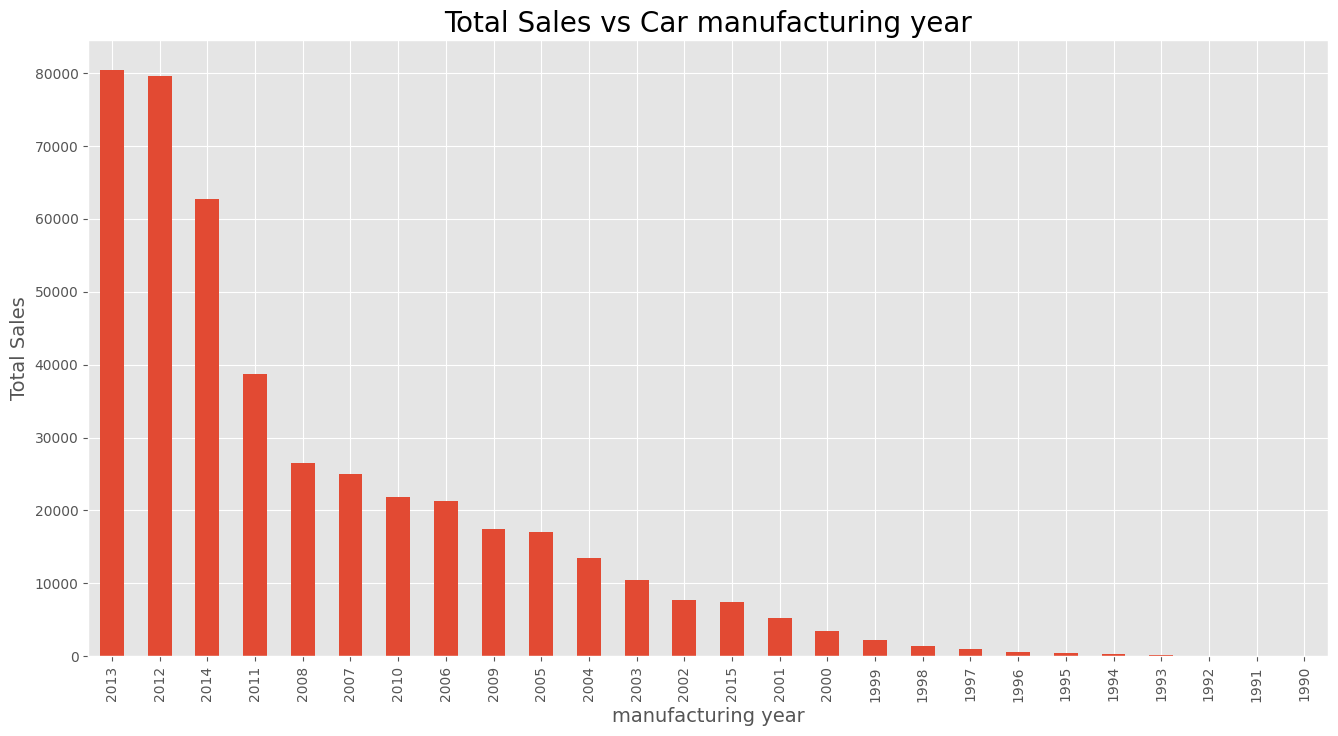

In [28]:
# Plotting Total Sales vs Car manufacturing year 
vehicle_sales_df['year'].value_counts().sort_values(ascending=False).plot(kind='bar', figsize=(16,8))
plt.xlabel('manufacturing year', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.title('Total Sales vs Car manufacturing year',  fontsize=20)
plt.grid(True)
plt.show()

# Summary

Through meticulous data examination and visualization, I explored various aspects of vehicle sales. Key findings included trends over time, popular car makes, manufacturing year and other features. The analysis provided valuable insights into market dynamics and consumer preferences.